In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("salaries.csv")

In [3]:
df.shape

(105434, 11)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Analist,65664,EUR,69120,NL,0,NL,M
1,2025,EN,FT,Data Analist,47652,EUR,50160,NL,0,NL,M
2,2025,EN,FT,Data Engineer,158113,USD,158113,US,0,US,M
3,2025,EN,FT,Data Engineer,87795,USD,87795,US,0,US,M
4,2025,EX,FT,Data Engineer,351410,USD,351410,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  object
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary              105434 non-null  int64 
 5   salary_currency     105434 non-null  object
 6   salary_in_usd       105434 non-null  int64 
 7   employee_residence  105434 non-null  object
 8   remote_ratio        105434 non-null  int64 
 9   company_location    105434 non-null  object
 10  company_size        105434 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.8+ MB


In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(52997)

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,105434.000000,1.054340e+05,105434.000000,105434.000000
mean,2024.188981,1.626908e+05,158018.514179,21.103249
std,0.669665,2.137236e+05,74401.714026,40.714744
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.064000e+05,106400.000000,0.000000
50%,2024.000000,1.471000e+05,147000.000000,0.000000
75%,2025.000000,1.997000e+05,199000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df['job_title'].count()

np.int64(105434)

In [10]:
df['experience_level'].count()

np.int64(105434)

In [11]:
df['company_size'].count()

np.int64(105434)

In [12]:
df['job_title'].unique()

array(['Data Analist', 'Data Engineer', 'Engineer', 'Systems Engineer',
       'Analytics Engineer', 'Data Architect', 'Data Manager',
       'BI Developer', 'Machine Learning Engineer',
       'Machine Learning Scientist', 'Business Intelligence Developer',
       'Product Manager', 'Data Scientist', 'AI Engineer',
       'Data Specialist', 'Research Engineer', 'Data Analyst',
       'Software Developer', 'Analyst', 'Software Engineer',
       'Site Reliability Engineer', 'Applied Scientist',
       'Computer Vision Engineer', 'Research Scientist',
       'Data Analytics Manager', 'Manager', 'AI Architect',
       'Data Developer', 'Solutions Architect', 'Architect', 'Stage',
       'Research Assistant', 'Business Intelligence Analyst',
       'Data Integration Engineer', 'Data Lead', 'Associate',
       'Quantitative Researcher', 'Business Intelligence Engineer',
       'Software Development Engineer', 'Data Management Specialist',
       'AI Developer', 'Data and Analytics Consultan

In [13]:
df['experience_level'].unique()

array(['EN', 'EX', 'SE', 'MI'], dtype=object)

In [14]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

# **VISUALIZATION**

<Axes: xlabel='salary_in_usd', ylabel='Count'>

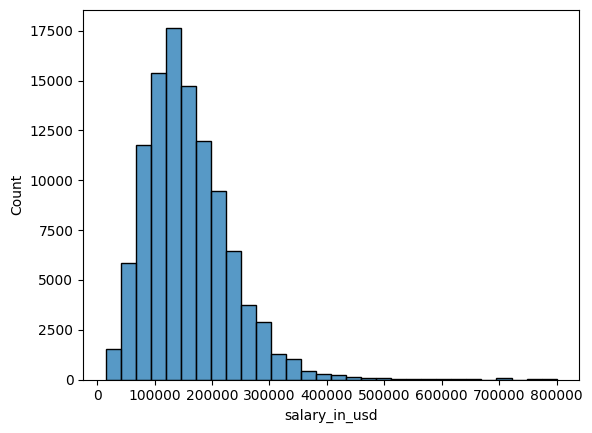

In [15]:
sns.histplot(df['salary_in_usd'],bins=30)

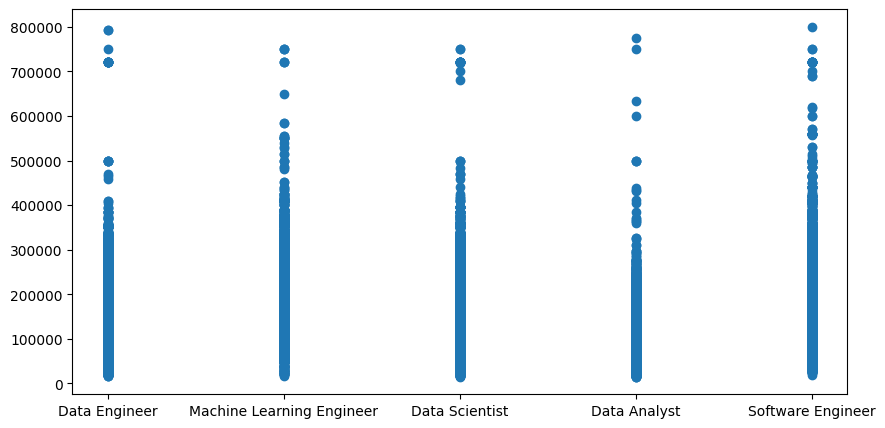

In [16]:
top_jobs = df['job_title'].value_counts().head(5).index
subset  =df[df['job_title'].isin(top_jobs)]
plt.figure(figsize=(10,5))
plt.scatter(subset['job_title'],subset['salary_in_usd'])

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

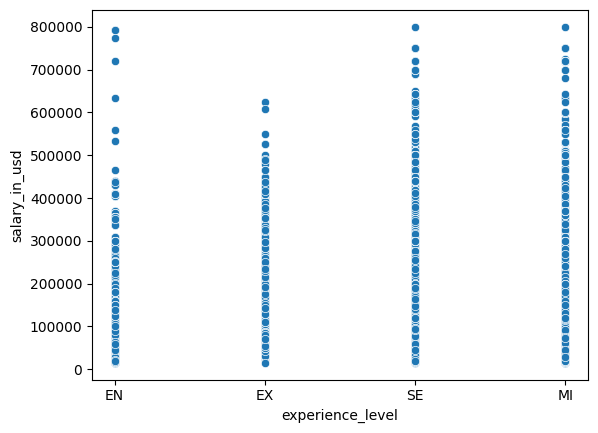

In [17]:
sns.scatterplot(x='experience_level',y='salary_in_usd',data=df)

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

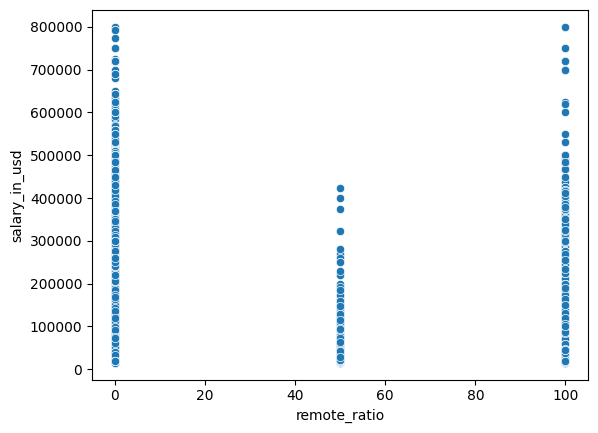

In [18]:
sns.scatterplot(x='remote_ratio',y='salary_in_usd',data=df)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

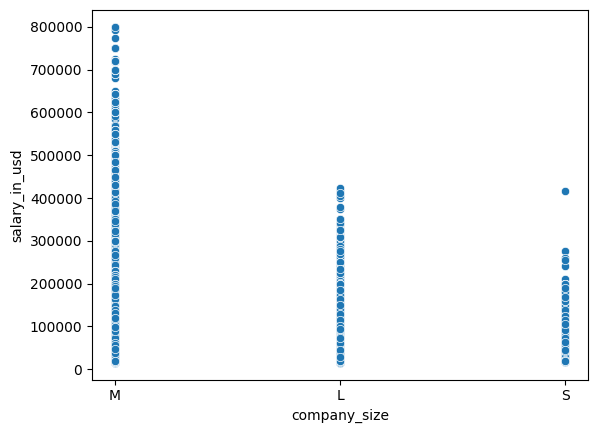

In [19]:
sns.scatterplot(x='company_size',y='salary_in_usd',data=df)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

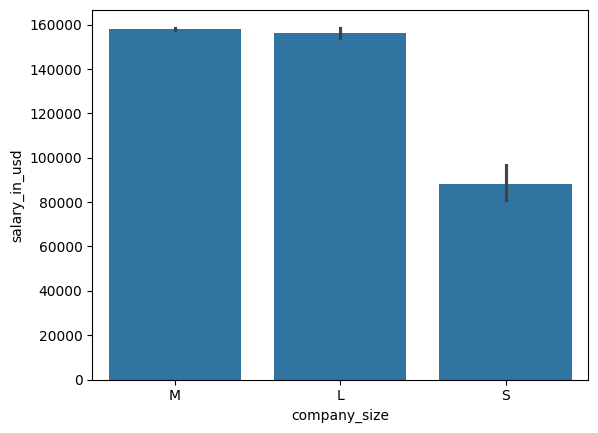

In [20]:
sns.barplot(x='company_size',y='salary_in_usd',data=df)

In [21]:
df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.019871,0.031559,-0.099432
salary,-0.019871,1.000000,0.317947,-0.001772
salary_in_usd,0.031559,0.317947,1.000000,-0.058492
remote_ratio,-0.099432,-0.001772,-0.058492,1.000000


<Axes: >

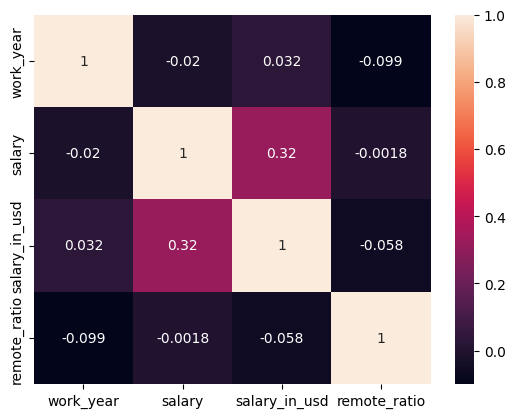

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='work_year', ylabel='Count'>

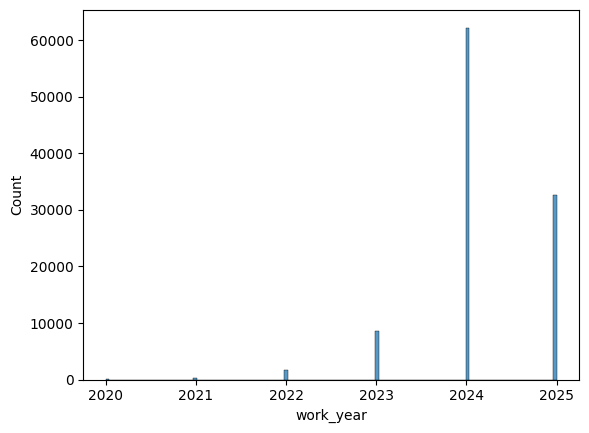

In [23]:
sns.histplot(df['work_year'])

<Axes: xlabel='count', ylabel='company_size'>

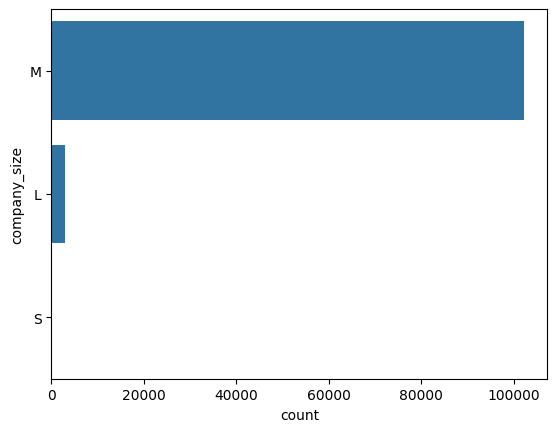

In [24]:
sns.countplot(df['company_size'])

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

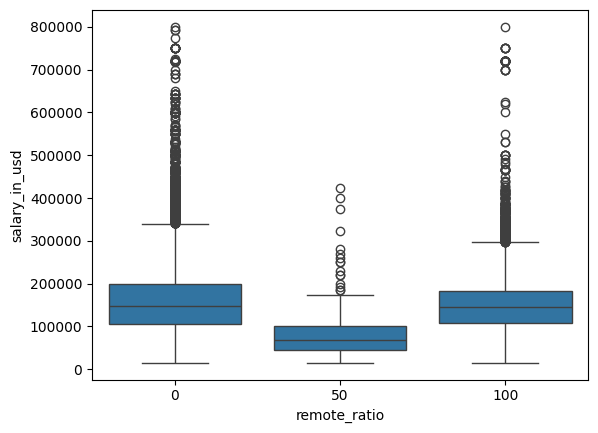

In [25]:
sns.boxplot(x='remote_ratio',y='salary_in_usd',data=df)

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

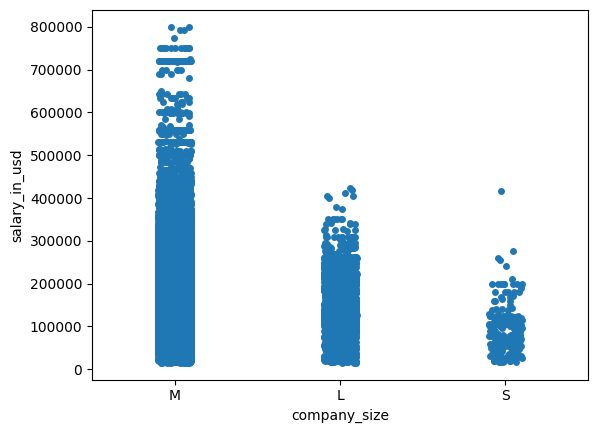

In [26]:
sns.stripplot(x='company_size',y='salary_in_usd',data=df)

# **ENCODING CATEGORICAL COLUMNS**

In [27]:
# from sklearn.preprocessing import LabelEncoder
# l = ['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']
# le = LabelEncoder()
# for i in l:
#   df[i] = le.fit_transform(df[i])

In [28]:
from sklearn.preprocessing import OneHotEncoder


In [29]:
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [30]:
X = pd.get_dummies(X)


# TRAIN TEST SPLIT

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = model.predict(X_test)

In [39]:
y_pred_train = model.predict(X_train)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # testing data accuracy

0.5424072141125731

In [41]:
r2_score(y_train,y_pred_train) #training data accuracy

0.4745959887430553

In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
def evaluate_model(model,X_train,y_train,X_test,y_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  print(f"Accuracy for your {model} is - ")
  print(f"training r2_Score for{model} is - {r2_score(y_train,train_pred)}")
  print(f"testing r2_Score for{model} is - {r2_score(y_test,test_pred)}")

  #MAE
  print(f"training MAE for{model} is - {mean_absolute_error(y_train,train_pred)}")
  print(f"testing  MAE for{model} is - {mean_absolute_error(y_test,test_pred)}")
  # RMSE
  print(f"training RMSE for{model} is - {root_mean_squared_error(y_train,train_pred)}")
  print(f"tesing RMSE for{model} is - {root_mean_squared_error(y_test,test_pred)}")

In [43]:
evaluate_model(model,X_train,y_train,X_test,y_test)

Accuracy for your LinearRegression() is - 
training r2_Score forLinearRegression() is - 0.4745959887430553
testing r2_Score forLinearRegression() is - 0.5424072141125731
training MAE forLinearRegression() is - 34785.802123665824
testing  MAE forLinearRegression() is - 35117.40638434619
training RMSE forLinearRegression() is - 53810.09039151979
tesing RMSE forLinearRegression() is - 50772.88800567736


# **APPLYING RIDGE ALGORITHM**

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [45]:
ridge = Ridge()

In [46]:
ridge_param = {
    "alpha" :[0.1,2,4,10,50,100]
}

In [47]:
ridge_search = GridSearchCV(ridge,ridge_param,cv=5)

In [48]:
ridge_search.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,100


In [49]:
best_ridge = ridge_search.best_estimator_

In [50]:
evaluate_model(best_ridge,X_train,y_train,X_test,y_test)

Accuracy for your Ridge(alpha=100) is - 
training r2_Score forRidge(alpha=100) is - 0.4745802722966286
testing r2_Score forRidge(alpha=100) is - 0.5421037928963512
training MAE forRidge(alpha=100) is - 34858.463538923475
testing  MAE forRidge(alpha=100) is - 35184.7667315965
training RMSE forRidge(alpha=100) is - 53810.895197973914
tesing RMSE forRidge(alpha=100) is - 50789.71849226346


In [51]:

from sklearn.neighbors import KNeighborsRegressor

# **  APPLYING KNN ALGORITHM**

In [52]:
model_knn = KNeighborsRegressor()

In [53]:
knn_param = {
    'n_neighbors' : [1,3,5,7,9,11]
}

In [54]:
knn_search = GridSearchCV(model_knn,knn_param,cv=5,n_jobs=-1)

In [55]:
knn_search.fit(X_train,y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [1, 3, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [56]:
best_knn = knn_search.best_estimator_

best_knn

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
evaluate_model(best_knn,X_train,y_train,X_test,y_test)

Accuracy for your KNeighborsRegressor(n_neighbors=1) is - 
training r2_Score forKNeighborsRegressor(n_neighbors=1) is - 1.0
testing r2_Score forKNeighborsRegressor(n_neighbors=1) is - 0.9434582291997828
training MAE forKNeighborsRegressor(n_neighbors=1) is - 0.0
testing  MAE forKNeighborsRegressor(n_neighbors=1) is - 3928.5660359463177
training RMSE forKNeighborsRegressor(n_neighbors=1) is - 0.0
tesing RMSE forKNeighborsRegressor(n_neighbors=1) is - 17847.483352345087


# **DECISION TREE ALGORITHM **

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model_dt = DecisionTreeRegressor()

In [60]:
dt_param = {
    'max_depth' : [3,5,7,10],
    'min_samples_split' : [2,5,10],
}

In [61]:
dt_search = GridSearchCV(model_dt,dt_param,cv=5)

In [62]:
dt_search.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [63]:
best_dt = dt_search.best_estimator_

In [64]:
evaluate_model(best_dt,X_train,y_train,X_test,y_test)

Accuracy for your DecisionTreeRegressor(max_depth=10) is - 
training r2_Score forDecisionTreeRegressor(max_depth=10) is - 0.9985927573143413
testing r2_Score forDecisionTreeRegressor(max_depth=10) is - 0.9977819335050215
training MAE forDecisionTreeRegressor(max_depth=10) is - 853.5839691428075
testing  MAE forDecisionTreeRegressor(max_depth=10) is - 944.3306848473637
training RMSE forDecisionTreeRegressor(max_depth=10) is - 2784.848215699833
tesing RMSE forDecisionTreeRegressor(max_depth=10) is - 3534.9197873909166


In [65]:
pd.DataFrame({
    'feature' : X.columns,
    'importance' : best_dt.feature_importances_
}).sort_values('importance',ascending=False)

,feature,importance
1,salary,0.980073
382,salary_currency_USD,0.004420
416,employee_residence_GB,0.002768
551,company_location_PL,0.002083
376,salary_currency_PLN,0.001955
...,...,...
572,company_location_ZA,0.000000
573,company_location_ZM,0.000000
55,job_title_Autonomous Vehicle Technician,0.000000
56,job_title_Azure Data Engineer,0.000000


<!-- RANDOM FOREST REGRESSION -->

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model_rf = RandomForestRegressor()

In [68]:
rf_param = {
    'n_estimators' : [50,100,150],
    'max_depth' : [5,10,15],
    'max_features' : ['sqrt','log2']
}

In [69]:
rf_search = GridSearchCV(model_rf,rf_param,cv=5,n_jobs=-1)

In [70]:
rf_search.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [71]:
best_rf = rf_search.best_estimator_


In [72]:
evaluate_model(best_rf,X_train,y_train,X_test,y_test)

Accuracy for your RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 
training r2_Score forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 0.6124313346472622
testing r2_Score forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 0.6041512753377981
training MAE forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 31490.463108226875
testing  MAE forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 31900.741451200553
training RMSE forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 46215.89397617225
tesing RMSE forRandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=150) is - 47223.36252775647


In [73]:
import pickle as pk

In [ ]:
# with open("decision_tree.pkl", "wb") as f:
#     pk.dump(dt_search.best_estimator_, f)


In [75]:
import joblib


In [76]:
bundle = {
    "best_model" : best_rf,
    "scaler" : scaler,
    "feature_columns": X.columns.tolist()
}

In [77]:
joblib.dump(bundle,"salary_prediction_model.pkl")
print("model_saved")

model_saved
